# Examples of entanglement measures

This notebook is intended to serve as a demonstration of the capabilities of the code provided in 'myfunctions.py'. This code has been programmed in Python and Qibo, as part of my final master thesis, 'Quantum Benchmarking: entanglement measures in quantum computers'.

In [1]:
#import general packages
import numpy as np
import matplotlib.pyplot as plt

#import qibo packages
from qibo.models import Circuit                                 #allows us to execute circuits.
from qibo import gates                                          #allows us to create quantum gates.
from qibo.quantum_info import random_unitary as U               #allows us to create random unitaries.


from myfunctions import Randomized_Renyi_2 as random_renyi2     #function for the randomized protocol.
from myfunctions import Swap_Renyi_n as swap_renyn              #funtion for the control-swap protocol.

## General circuit examples

In the following sections, we will assess the protocol by applying it to various types of quantum circuits. To begin, let's introduce the initial quantum circuits under consideration.

In [2]:
def GHZ(nqubits):
    '''
    This function returns a circuit for the Greenberger-Horne-Zeilinger (GHZ) state of n-qubits.
    Parameters:
        nqubits: number of qubits.
    '''
    c = Circuit(nqubits)
    c.add(gates.H(0))
    for i in range(nqubits-1):
        c.add(gates.CNOT(i, i+1))
    return c

def GS(nqubits):
    '''
    This function returns a circuit for a Graph state (GS) of n-qubits.
    Parameters:
        nqubits: number of qubits.
    '''
    c = Circuit(nqubits)
    for i in range(nqubits):
        c.add(gates.H(i))
    for i in range(nqubits):
        if i==nqubits-1:
            c.add(gates.CZ(0,nqubits-1))
        else:
            c.add(gates.CZ(i, i+1))
    return c

def RS(nqubits): 
    '''
    This function returns a circuit for a Random state (RS) of n-qubits.
    Parameters:
        nqubits: number of qubits.
    '''       
    c = Circuit(nqubits)
    if nqubits % 2 ==0:
        for i in range(nqubits):
            U_gate = U(2, 'haar')
            c.add(gates.Unitary(U_gate,i))
        for i in range(0, nqubits, 2):
            c.add(gates.CZ(i, i+1))
        for i in range(nqubits):
            U_gate = U(2, 'haar')
            c.add(gates.Unitary(U_gate,i))
        for i in range(0, nqubits, 2):
            if i == nqubits - 2:
                break
            else:
                c.add(gates.CZ(i+1, i+2))
        c.add(gates.CZ(0, nqubits -1))
        for i in range(nqubits):
            U_gate = U(2, 'haar')
            c.add(gates.Unitary(U_gate,i))

    else:
        for i in range(nqubits):
            U_gate = U(2, 'haar')
            c.add(gates.Unitary(U_gate,i))
        for i in range(0, nqubits - 1 , 2):
            c.add(gates.CZ(i, i+1))
        for i in range(nqubits):
            U_gate = U(2, 'haar')
            c.add(gates.Unitary(U_gate,i))
        for i in range(1, nqubits - 1, 2):
            c.add(gates.CZ(i, i+1))
        c.add(gates.CZ(0, nqubits -1))
        for i in range(nqubits):
            U_gate = U(2, 'haar')
            c.add(gates.Unitary(U_gate,i))

    return c


Let's take a look at the form of the circuits and their final quantum state, for 5 qubits.

In [3]:
nqubits = 5

ghz = GHZ(nqubits)      #calls the circuit
state = ghz()           #executes the theoretical circuit

print('This is the GHZ circuit \n', ghz.draw(), '\n')
print('and this is its quantum state \n', state)
print('\n')

gs = GS(nqubits)
state = gs()

print('This is a GS circuit \n', gs.draw(), '\n')
print('and this is its quantum state \n', state)
print('\n')

rs = RS(nqubits)
state = rs()

print('This is a RS circuit \n', rs.draw(), '\n')
print('and this is its quantum state \n', state)

[Qibo 0.1.12.dev0|INFO|2023-07-10 16:40:59]: Using qibojit (numba) backend on /CPU:0


This is the GHZ circuit 
 q0: ─H─o───────
q1: ───X─o─────
q2: ─────X─o───
q3: ───────X─o─
q4: ─────────X─ 

and this is its quantum state 
 (0.70711+0j)|00000> + (0.70711+0j)|11111>


This is a GS circuit 
 q0: ─H─o───────o─
q1: ─H─Z─o─────|─
q2: ─H───Z─o───|─
q3: ─H─────Z─o─|─
q4: ─H───────Z─Z─ 

and this is its quantum state 
 (0.17678+0j)|00000> + (0.17678+0j)|00001> + (0.17678+0j)|00010> + (-0.17678+0j)|00011> + (0.17678+0j)|00100> + (0.17678+0j)|00101> + (-0.17678+0j)|00110> + (0.17678-0j)|00111> + (0.17678+0j)|01000> + (0.17678+0j)|01001> + (0.17678+0j)|01010> + (-0.17678+0j)|01011> + (-0.17678+0j)|01100> + (-0.17678+0j)|01101> + (0.17678-0j)|01110> + (-0.17678+0j)|01111> + (0.17678+0j)|10000> + (-0.17678+0j)|10001> + (0.17678+0j)|10010> + (0.17678-0j)|10011> + ...


This is a RS circuit 
 q0: ─U─o───U─────o─U─
q1: ─U─Z───U─o───|─U─
q2: ─U───o─U─Z───|─U─
q3: ─U───Z─U───o─|─U─
q4: ─U─────U───Z─Z─U─ 

and this is its quantum state 
 (-0.19138+0.10276j)|00000> + (0.08011-0.29946j)|0

Now, let's compute the theoretical exact n-order Rényi entropy using the 'Exact()' option in 'Swap_Renyi_n()' function and compare it with both protocols. In the swap protocol, we are using the 'Measurement()' option to execute the protocol. For the randomized protocol, local and global approach are selected using options 'Local()' and 'Global()' respectively. For both cases we need to execute 'entropy()' in order to retrive the final value.

In [4]:
f1 = swap_renyn()               #let's call the swap protocol f1.
f2 = random_renyi2()            #let's call the randomized protocol f2.

First, let's focus on the Swap protocol and the order $n$.

In [5]:
n = 2                           #order of the Rényi entropy     
N_A = [0,1,2]                   #indicates that subsystem A is composed by qubits 0,1,2 of the circuit.


#we execute the exact calculations for the ghz, gs and rs.
f1.Exact(n, nqubits, N_A, ghz)  #call for the exact value
exact_ghz = f1.entropy()[0]

f1.Exact(n, nqubits, N_A, gs) 
exact_gs = f1.entropy()[0]

f1.Exact(n, nqubits, N_A, rs) 
exact_rs = f1.entropy()[0]

N_M = 10000                     #we define the number of measurements performed in the swap protocol.

#we execute the estimated calculations for the ghz, gs and rs.
f1.Measurement(n, nqubits, N_A, ghz, N_M)   #calls the swap protocol
swap_estimated_ghz = f1.entropy()           #retrives the entropy value
swap_error_ghz = f1.error()                 #retrives the standard error correction

f1.Measurement(n, nqubits, N_A, gs, N_M)
swap_estimated_gs = f1.entropy()
swap_error_gs = f1.error()


f1.Measurement(n, nqubits, N_A, rs, N_M)
swap_estimated_rs = f1.entropy()
swap_error_rs = f1.error()

print('GHZ --- Exact: ', "%.6f" % exact_ghz, '--- Estimated: ', "%.6f" % swap_estimated_ghz, '+-', "%.6f" % swap_error_ghz)
print('GS --- Exact: ', "%.6f" % exact_gs, '--- Estimated: ', "%.6f" % swap_estimated_gs, '+-', "%.6f" % swap_error_gs)
print('RS --- Exact: ', "%.6f" % exact_rs, '--- Estimated: ', "%.6f" % swap_estimated_rs, '+-', "%.6f" % swap_error_rs)


GHZ --- Exact:  1.000000 --- Estimated:  1.008682 +- 0.017811
GS --- Exact:  2.000000 --- Estimated:  1.947862 +- 0.038012
RS --- Exact:  0.894258 --- Estimated:  0.924673 +- 0.016460


Next, let's focus on the randomized protocol.

In [6]:
N_U = 1000                      #we define the number of unitaries ensambles performed in the randomized protocol.
N_M = 10000                     #we define the number of measurements performed in the randomized protocol.
N_A = [0,1,2]                   #indicates that subsystem A is composed by qubits 0,1,2 of the circuit.

#we execute the estimated calculations on the local approach
f2.Local(ghz, N_A, N_U, N_M)                 #calls the local protocol
local_estimated_ghz = f2.entropy()           #retrives the entropy value
local_error_ghz = f2.error()                 #retrives the standard error correction

f2.Local(gs, N_A, N_U, N_M)
local_estimated_gs = f2.entropy()
local_error_gs = f2.error()


f2.Local(rs, N_A, N_U, N_M)
local_estimated_rs = f2.entropy()
local_error_rs = f2.error()

#the same on the global approach
f2.Global(ghz, N_A, N_U, N_M)                 #calls the global protocol
global_estimated_ghz = f2.entropy()           #retrives the entropy value
global_error_ghz = f2.error()                 #retrives the standard error correction

f2.Global(gs, N_A, N_U, N_M)
global_estimated_gs = f2.entropy()
global_error_gs = f2.error()


f2.Global(rs, N_A, N_U, N_M)
global_estimated_rs = f2.entropy()
global_error_rs = f2.error()


print('GHZ --- Exact: ', "%.6f" % exact_ghz, '--- Local Estimated: ', "%.6f" % local_estimated_ghz, '+-', "%.6f" % local_error_ghz, '--- Global Estimated: ', "%.6f" % global_estimated_ghz, '+-', "%.6f" % global_error_ghz )
print('GS --- Exact: ', "%.6f" % exact_gs, '--- Local Estimated: ', "%.6f" % local_estimated_gs, '+-', "%.6f" % local_error_gs, '--- Global Estimated: ', "%.6f" % global_estimated_gs, '+-', "%.6f" % global_error_gs )
print('RS --- Exact: ', "%.6f" % exact_rs, '--- Local Estimated: ', "%.6f" % local_estimated_rs, '+-', "%.6f" % local_error_rs, '--- Global Estimated: ', "%.6f" % global_estimated_rs, '+-', "%.6f" % global_error_rs )

GHZ --- Exact:  1.000000 --- Local Estimated:  1.006794 +- 0.002658 --- Global Estimated:  1.004381 +- 0.002640
GS --- Exact:  2.000000 --- Local Estimated:  1.979411 +- 0.004218 --- Global Estimated:  2.009182 +- 0.004372
RS --- Exact:  0.894258 --- Local Estimated:  0.868297 +- 0.002771 --- Global Estimated:  0.909201 +- 0.002542


As we can see, both protocols demonstrate efficient and straightforward execution, providing accurate estimates along with appropriate error corrections.

## Two-site Fermi-Hubbard example

In this study, we apply both protocols to replicate the findings reported in [N. M. Linke, S. Johri, C. Figgatt, et al., Phys. Rev. A 98, 052334](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.052334). This original work focuses on measuring the 2nd-order Rényi entropy of the ground state of a two-site Fermi-Hubbard model using a 5-qubit trapped ions computer. The executed circuit is given by Fig.1, where we find two ways to discretize the adiabatic evolution and evolve the on-site interaction $U$ of the Fermi-Hubbard model.

<center><img src="fig1.png" width="501"/></center>

The plots we are trying to replicate are shown in Fig.2. In this case, we need to estimate the purity $R_2$.

<center><img src="fig2.png" width="1200"/></center>

First, let's definte the quantum circuits to inicialize our states.

In [7]:
def FH_I(M):
    '''
    This function returns a circuit for the two-site Fermi-Hubbard 
    using Model I of adiabatic evolution discretitzation, for M steps.
    Parameters:
        M: number of maximum steps on the adiabatic evolution.
    '''
    delta = 0.1     #time
    tau = 0.1       #time discretization
    m = np.linspace(1,M,M)
    phi = m*delta**2/tau

    c = Circuit(2)
    #state preparation
    c.add(gates.H(0))
    c.add(gates.H(1))

    #addiabatic evolution on both systems for different steps
    for step in phi:
        c.add(gates.RX(0, -2*delta))
        c.add(gates.RX(1, -2*delta))

        c.add(gates.CNOT(0,1))

        c.add(gates.RZ(1, step))

        c.add(gates.CNOT(0,1))
    return c

def FH_II(U):
    '''
    This function returns a circuit for the two-site Fermi-Hubbard 
    using Model II of adiabatic evolution discretitzation, for U <= M, 
    where M is the maximum number of steps in the adiabatic evolution.
    Parameters:
        U: on-site interaction value.
    '''
    M = 5           
    #variables
    delta = 0.25     #time
    tau = M*delta/U      #time discretization
    m = np.linspace(1,M,M)
    phi = m*delta**2/tau
    #let's construct the circuit
    c = Circuit(2, density_matrix = False)

    #state preparation
    c.add(gates.H(0))
    c.add(gates.H(1))

    #addiabatic evolution on both systems for different steps
    for step in phi:
        c.add(gates.RX(0, -2*delta))
        c.add(gates.RX(1, -2*delta))

        c.add(gates.CNOT(0,1))

        c.add(gates.RZ(1, step))

        c.add(gates.CNOT(0,1))
    return c

Let's take a look at the form of the circuits and their quantum state representation.

In [8]:
m = 5           #adiabatic evolution steps
u = 5           #in-site interaction 

c1 = FH_I(m)
c2 = FH_II(u)

result1 = c1()
result2 = c2()

print('This is the FH_I model circuit \n', c1.draw(), '\n')
print('and this is its quantum state \n', result1)
print('\n')
print('-------------------------------------------------------------------------------------------')

print('This is the FH_II model circuit\n', c2.draw(), '\n')
print('and this is its quantum state \n', result2)

This is the FH_I model circuit 
 q0: ─H─RX─o────o─RX─o────o─RX─o────o─RX─o────o─RX─o────o─
q1: ─H─RX─X─RZ─X─RX─X─RZ─X─RX─X─RZ─X─RX─X─RZ─X─RX─X─RZ─X─ 

and this is its quantum state 
 (0.30288+0.1018j)|00> + (0.02055+0.63046j)|01> + (0.02055+0.63046j)|10> + (0.30288+0.1018j)|11>


-------------------------------------------------------------------------------------------
This is the FH_II model circuit
 q0: ─H─RX─o────o─RX─o────o─RX─o────o─RX─o────o─RX─o────o─
q1: ─H─RX─X─RZ─X─RX─X─RZ─X─RX─X─RZ─X─RX─X─RZ─X─RX─X─RZ─X─ 

and this is its quantum state 
 (-0.25702+0.02989j)|00> + (-0.64699-0.12022j)|01> + (-0.64699-0.12022j)|10> + (-0.25702+0.02989j)|11>


Finally, let's compute the purity values using both protocols and let's plot the results.

In [9]:
f1 = swap_renyn()               #let's call the swap protocol f1.
f2 = random_renyi2()            #let's call the randomized protocol f2.

In [10]:
#we create list to save the results for the swap protocol
RI_exact = []
RI_estimated_swap = []
RI_error_swap = []

RII_exact = []
RII_estimated_swap = []
RII_error_swap = []

n_order = 2     #order of the rényi entropy we estimate in the swap protocol.
nqubits = 2     #number of qubits of the initial state. In this case, must always be 2 for this FH model.
M_steps = 7     #number of maximum steps in the adiabatic evolution. Important in method I.
M = 5           #fixed number steps in the adiabatic evolution. Important in method II.


N_M = 1000      #number of measurements for the swap protocol.
N_A = [0]       #subsystem A is composed by qubit 0 of the initial circuit.

#here we give the exact value and the swap estimation for mutiple steps in method I.
for n in range(M_steps):
    c = FH_I(n)
    f1.Exact(n_order, nqubits, N_A, c) 
    exact = f1.entropy()[0]
    exact = 2**(-exact)

    c = FH_I(n)
    f1.Measurement(n_order, nqubits, N_A, c, N_M)
    swap_estimatedx = f1.entropy()
    swap_estimated = 2**(-swap_estimatedx)
    swap_error = f1.error()
    swap_error = swap_estimatedx*np.log(2)*swap_error

    RI_exact.append(exact)
    RI_estimated_swap.append(swap_estimated)
    RI_error_swap.append(swap_error)

print('Swap Protocol on FH model I is completed!!!')

#here we give the exact value and the swap estimation for mutiple steps in method II.
interaction = np.linspace(0,M,11)
for u in interaction:
    c = FH_II(u)
    f1.Exact(n_order, nqubits, N_A, c) 
    exact = f1.entropy()[0]
    exact = 2**(-exact)

    c = FH_II(u)
    f1.Measurement(n_order, nqubits, N_A, c, N_M)
    swap_estimated = f1.entropy()
    swap_estimated = 2**(-swap_estimated)
    swap_error = f1.error()
    swap_error = swap_estimated*np.log(2)*swap_error

    RII_exact.append(exact)
    RII_estimated_swap.append(swap_estimated)
    RII_error_swap.append(swap_error)

print('Swap Protocol on FH model II is completed!!!')

N_U = 1000          #number of unitary ensembles applied in the randomized protocol.
N_M = 10000         #number of measurements per unitary ensemble applied in the randomized protocol.

#we create list to save the results for the random local protocol
RI_estimated_local = []
RI_error_local = []

RII_estimated_local = []
RII_error_local = []

#here we give local estimation for mutiple steps in method I.
for n in range(M_steps):
    c = FH_I(n)
    f2.Local(c, N_A, N_U, N_M)
    estimatedx = f2.entropy()
    estimated = 2**(-estimatedx)
    errorx = f2.error()
    error = np.abs(estimatedx*np.log(2)*errorx)

    RI_estimated_local.append(estimated)
    RI_error_local.append(error)

print('Local Random Protocol on FH model I is completed!!!')

#here we give local estimation for mutiple steps in method II.
for u in interaction:
    c = FH_II(u)
    f2.Local(c, N_A, N_U, N_M)
    estimatedx = f2.entropy()
    estimated = 2**(-estimatedx)
    errorx = f2.error()
    error = np.abs(estimatedx*np.log(2)*errorx)

    RII_estimated_local.append(estimated)
    RII_error_local.append(error)

print('Local Random Protocol on FH model II is completed!!!')

#we create list to save the results for the random global protocol
RI_estimated_global = []
RI_error_global = []

RII_estimated_global = []
RII_error_global = []

#here we give global estimation for mutiple steps in method I.
for n in range(M_steps):
    c = FH_I(n)
    f2.Global(c, N_A, N_U, N_M)
    estimatedx = f2.entropy()
    estimated = 2**(-estimatedx)
    errorx = f2.error()
    error = np.abs(estimatedx*np.log(2)*errorx)

    RI_estimated_global.append(estimated)
    RI_error_global.append(error)

print('Global Random Protocol on FH model I is completed!!!')

#here we give global estimation for mutiple steps in method II.
for u in interaction:
    c = FH_II(u)
    f2.Global(c, N_A, N_U, N_M)
    estimatedx = f2.entropy()
    estimated = 2**(-estimatedx)
    errorx = f2.error()
    error = np.abs(estimatedx*np.log(2)*errorx)

    RII_estimated_global.append(estimated)
    RII_error_global.append(error)

print('Global Random Protocol on FH model II is completed!!!')

Swap Protocol on FH model I is completed!!!
Swap Protocol on FH model II is completed!!!


C:\Users\juanm\AppData\Local\Temp\ipykernel_16076\3763447015.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  tau = M*delta/U      #time discretization


Local Random Protocol on FH model I is completed!!!
Local Random Protocol on FH model II is completed!!!
Global Random Protocol on FH model I is completed!!!
Global Random Protocol on FH model II is completed!!!


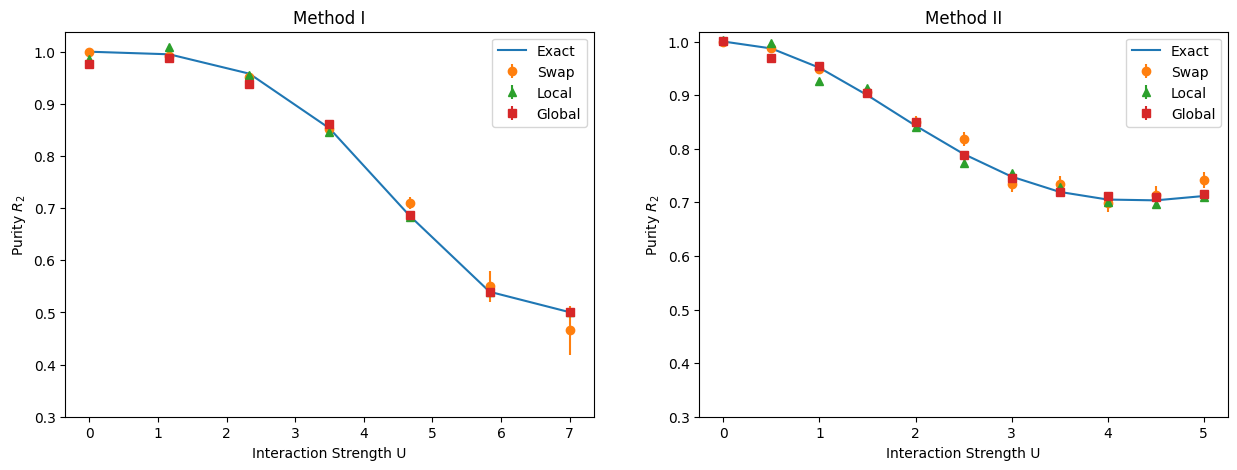

In [11]:
#let's plot the results
M_steps = 7
iter1 = np.linspace(0,M_steps,M_steps)

M = 5
iter2 = np.linspace(0,M,11)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.plot(iter1, RI_exact, '-', label = 'Exact')
ax1.errorbar(iter1, RI_estimated_swap, yerr = RI_error_swap, fmt = 'o', label = 'Swap')
ax1.errorbar(iter1, RI_estimated_local, yerr = RI_error_local, fmt = '^', label = 'Local')
ax1.errorbar(iter1, RI_estimated_global, yerr = RI_error_global, fmt = 's', label = 'Global')
ax1.set_title('Method I')
ax1.set(xlabel='Interaction Strength U', ylabel='Purity $R_2$')
ax1.legend()
ax1.set_ylim(bottom = 0.3)

ax2.plot(iter2, RII_exact, '-', label = 'Exact')
ax2.errorbar(iter2, RII_estimated_swap, yerr = RII_error_swap, fmt = 'o', label = 'Swap')
ax2.errorbar(iter2, RII_estimated_local, yerr = RII_error_local, fmt = '^', label = 'Local')
ax2.errorbar(iter2, RII_estimated_global, yerr = RII_error_global, fmt = 's', label = 'Global')
ax2.set_title('Method II')
ax2.set(xlabel='Interaction Strength U', ylabel='Purity $R_2$')
ax2.legend()
ax2.set_ylim(bottom = 0.3)
plt.show()
